In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (14,8)
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
#plt.style.use('ggplot')

In [3]:
max_no_words = 30
d_model = 512

# Positional encoding as in  transformer

In [4]:
pos = np.arange(max_no_words)
i = np.arange(d_model) + 1
x_denom =  (10000**(((i+1)//2*2)/d_model)).reshape(1,-1)

x = pos.reshape(-1,1) / x_denom

pe = np.zeros_like(x)
pe[:,::2] = np.sin(x[:,::2])
pe[:,1::2] = np.cos(x[:,1::2])

#print(x[:10,:4])

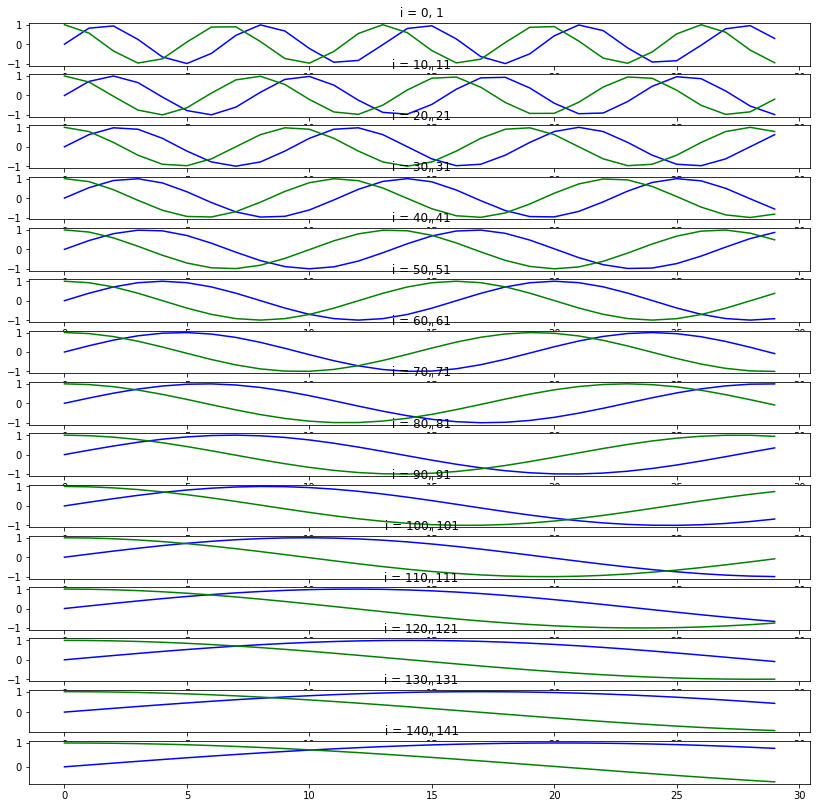

In [5]:
fig,axs = plt.subplots(15, figsize=(14,14))
for i,ax in enumerate(axs):
    ax.plot(pe[:,0 + i*10])
    ax.plot(pe[:,1 + i*10])
    ax.set_title(f' i = {i*10}, {i*10+1}')

## dot produkt between positions

In [6]:
def plot_dot(pe, label=''):
    p = max_no_words//3
    i = np.arange(max_no_words)
    pe_dot = np.zeros_like(i, dtype=float)
    for j in i:
        pe_dot[j] = pe[p] @ pe[j]
    plt.plot(pe_dot, label=label)
    plt.axvline(p, color='g', )

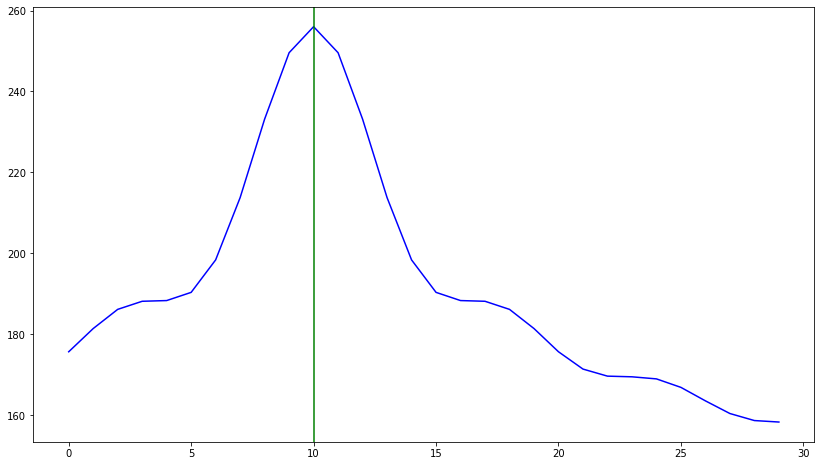

In [7]:
plot_dot(pe)

In [8]:
def plot_dot_2d(pe):
    N = pe.shape[0]
    d = np.zeros((N,N))
    for x in range(N):
        for y in range(N):
            d[x,y] = pe[x] @ pe[y]
    plt.imshow(d)
    plt.colorbar()
    plt.xlabel('pos')
    plt.ylabel('pos')
    plt.title('dot product depending on words position')
    

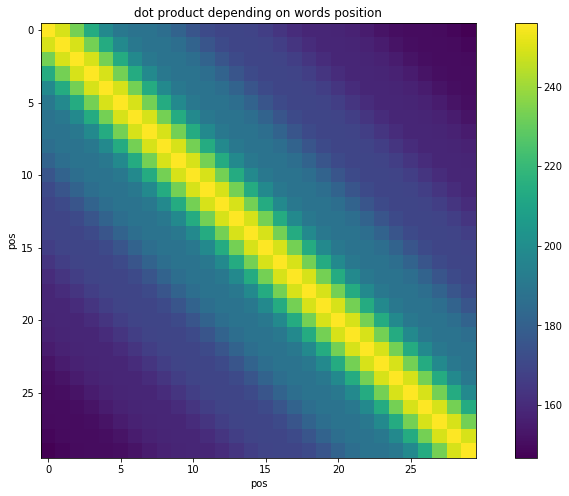

In [9]:
plot_dot_2d(pe)

# PE with added noise (imitate embedding)


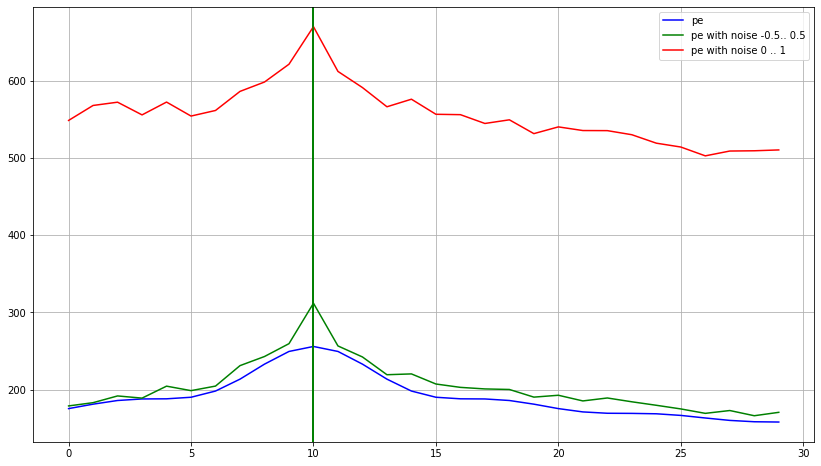

In [10]:
x = np.random.random(pe.shape) - 0.5
plot_dot(pe, 'pe')
plot_dot(pe + x, 'pe with noise -0.5.. 0.5')
plot_dot(pe + x+0.5, 'pe with noise 0 .. 1')

plt.legend(); plt.grid();

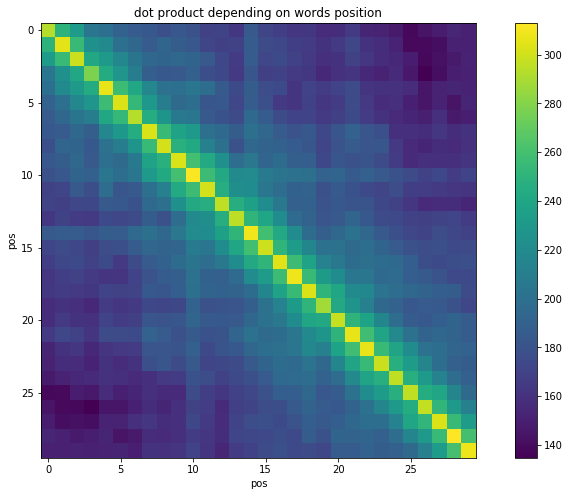

In [11]:
plot_dot_2d(pe + x)

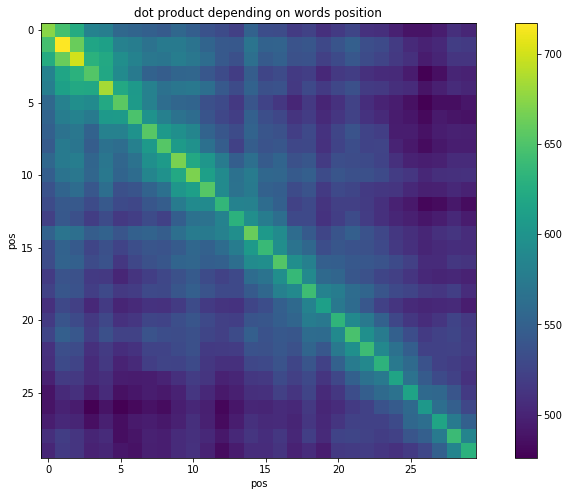

In [12]:
plot_dot_2d(pe + x + 0.5)